In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data
# Combine the data into a single dataset
combined_data= pd.merge(mouse_drug_data,clinical_trial_data, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tomor_volume_df = combined_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)']
volume_df=tomor_volume_df.mean()
# Convert to DataFrame
tomor_response_df=pd.DataFrame(volume_df)
# Preview DataFrame
tomor_response_df.reset_index(inplace=True)
tomor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_sem =tomor_volume_df.sem() 

# Convert to DataFrame
response_df_new=pd.DataFrame(standard_error_sem)
response_df_new.reset_index(inplace=True)
# Preview DataFrame
response_df_new.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
df1=response_df_new.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
df1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [20]:
# Minor Data Munging to Re-Format the Data Frames
munging_df=tomor_response_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
munging_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


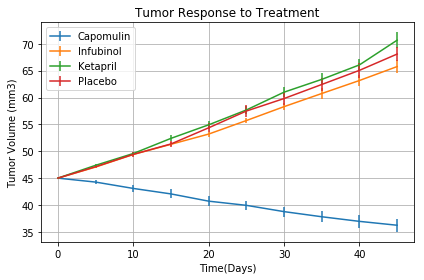

In [19]:
# Generate the Plot (with Error Bars)
cols_plot=['Capomulin','Infubinol','Ketapril','Placebo']
#axes=munging_df[cols_plot].plot(marker='o',alpha=0.5,linestyle='-',figsize=(8,8),grid=True)
for drugs in cols_plot:
    plt.errorbar(munging_df.index,munging_df[drugs],yerr=df1[drugs])

plt.title('Tumor Response to Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.legend(loc="best")
plt.grid(True)
#Save the Figure
plt.savefig("../Images/Tumor Response to Treatment.png")

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = combined_data.groupby(["Drug", "Timepoint"])['Metastatic Sites']
metastatic_mean_df=metastatic_df.mean()
# Convert to DataFrame
metastatic_new_df=pd.DataFrame(metastatic_mean_df)
# Preview DataFrame
metastatic_new_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met =metastatic_df.sem()
# Convert to DataFrame
met_df_new=pd.DataFrame(standard_error_met)
met_df_new.reset_index(inplace=True)
# Preview DataFrame
met_df_new.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df=met_df_new.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


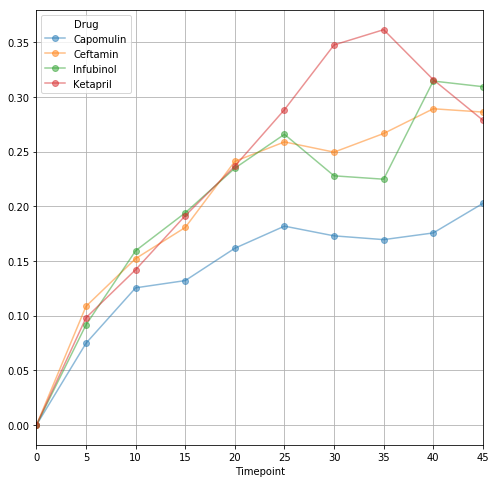

In [12]:
# Generate the Plot (with Error Bars)
cols_plot=['Capomulin','Ceftamin','Infubinol','Ketapril']
axes=reformat_df[cols_plot].plot(marker='o',alpha=0.5,linestyle='-',figsize=(8,8),grid=True)

# Save the Figure
plt.savefig("../Images/Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#mice_count=combined_data["Mouse ID"].unique()
survival_df = combined_data.groupby(["Drug", "Timepoint"])['Mouse ID']
# Convert to DataFrame
survival_new_df=pd.DataFrame(survival_df)
#survival_new_df.reset_index(inplace=True)
# Preview DataFrame
survival_new_df.head()

,0,1
0,"(Capomulin, 0)",581 b128 591 r944 601 s185 611 w91...
1,"(Capomulin, 5)",582 b128 592 r944 602 s185 612 w91...
2,"(Capomulin, 10)",583 b128 593 r944 603 s185 613 w91...
3,"(Capomulin, 15)",584 b128 594 r944 604 s185 614 w91...
4,"(Capomulin, 20)",585 b128 595 r944 605 s185 615 w91...


In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [15]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [17]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()